In [13]:
!sim="ONT.R10.4"; IsoQuant/isoquant.py -t 32 -d nanopore --stranded forward --fastq Mouse.${sim}.simulated.shuffled.fastq \
 --reference lrgasp_grcm39_sirvs.fasta --genedb lrgasp_gencode_vM27_sirvs.gtf.gz --complete_genedb \
 --output IsoQuant_Mouse_IQ_${sim} --prefix IsoQuant_Mouse_IQ_${sim}

2024-08-15 17:18:40,752 - INFO - Running IsoQuant version 3.3.0
2024-08-15 17:18:40,753 - WARNING - Output folder already contains a previous run, some files may be overwritten. Use --resume to resume a failed run. Use --force to avoid this message. Press Ctrl+C to interrupt the run now.
2024-08-15 17:18:49,754 - INFO - Overwriting the previous run
ERROR! Input file Mouse.ONT.R10.4.simulated.shuffled.fastq does not exist


In [14]:
!sim="PB"; IsoQuant/isoquant.py -t 32 -d pacbio --stranded forward --fastq Mouse.${sim}.simulated.shuffled.fastq \
 --reference lrgasp_grcm39_sirvs.fasta --genedb lrgasp_gencode_vM27_sirvs.gtf --complete_genedb \
 --output IsoQuant_Mouse_IQ_${sim} --prefix IsoQuant_Mouse_IQ_${sim}

2024-08-15 17:18:51,809 - INFO - Running IsoQuant version 3.3.0
2024-08-15 17:18:51,809 - WARNING - Output folder already contains a previous run, some files may be overwritten. Use --resume to resume a failed run. Use --force to avoid this message. Press Ctrl+C to interrupt the run now.
2024-08-15 17:19:00,811 - INFO - Overwriting the previous run
ERROR! Input file Mouse.PB.simulated.shuffled.fastq does not exist


In [15]:
'''
#bambu Run 
library(bambu)

fa.file <- "/home/rebekah/lrgasp_grcm39_sirvs.fasta"

gtf.file <- "/home/rebekah/lrgasp_gencode_vM27_sirvs.gtf"

bambuAnnotations <- prepareAnnotations(gtf.file)

se <- bambu(reads = path_to_bam_generated_by_IsoQuant, annotations = bambuAnnotations, genome = fa.file, discovery = FALSE)
writeBambuOutput(se, path = "output_path")
'''

'\n#bambu Run \nlibrary(bambu)\n\nfa.file <- "/home/rebekah/lrgasp_grcm39_sirvs.fasta"\n\ngtf.file <- "/home/rebekah/lrgasp_gencode_vM27_sirvs.gtf"\n\nbambuAnnotations <- prepareAnnotations(gtf.file)\n\nse <- bambu(reads = path_to_bam_generated_by_IsoQuant, annotations = bambuAnnotations, genome = fa.file, discovery = FALSE)\nwriteBambuOutput(se, path = "output_path")\n'

In [16]:
'''
#Oarfish run
import os

def run(cdna_ref, bs, fastq):
    os.system("minimap2 -t 32 -ax map-ont -N 100 "+cdna_ref+" "+fastq+" | samtools view -@4 -h -F 2052 -bS > "+bs+".bam")
    os.system("oarfish --alignments "+bs+".bam --threads 32 --output "+bs+"_oarfish --model-coverage --filter-group no-filters")

run("ref/LRGASP.cdna.fa", sim+"_Oarfish", "Mouse."+sim+".simulated.shuffled.fastq")
'''

'\n#Oarfish run\nimport os\n\ndef run(cdna_ref, bs, fastq):\n    os.system("./LRGASP_data/minimap2-2.28_x64-linux/minimap2 -t 32 -ax map-ont -N 100 "+cdna_ref+" "+fastq+" > "+bs+".sam")\n    os.system("samtools view -bS -o "+bs+".bam "+bs+".sam")\n    os.system("oarfish --alignments "+bs+".bam --threads 32 --output "+bs+"_oarfish --model-coverage --filter-group no-filters")\n\nrun("ref/LRGASP.cdna.fa", sim+"_Oarfish", "Mouse."+sim+".simulated.shuffled.fastq")\n'

In [11]:
#${kallisto} index -i LRGASP.k-${k}.v-13.idx -k ${k} LRGASP.cdna.fasta
 #'PB' #'ONT.R10.4'
#--long --error-rate $er --threshold 0.8
!kallisto='/home/rebekah/kallisto_devel/kallisto/build/src/kallisto';\
 bustools='bustools/build/src/bustools';\
 k=63;\
 sim='PB';\
 ${kallisto} bus -t 30 -x bulk --long --threshold 0.8 \
 -i LRGASP.k-${k}.v-13.idx Mouse.${sim}.simulated.shuffled.fastq.gz \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er; \
 ${bustools} sort -t 30 Mouse.${sim}.simulated.shuffled._k-${k}_er/output.bus \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er/sorted.bus; \
 ${bustools} count -t 30 Mouse.${sim}.simulated.shuffled._k-${k}_er/sorted.bus \
 -t Mouse.${sim}.simulated.shuffled._k-${k}_er/transcripts.txt \
 -e Mouse.${sim}.simulated.shuffled._k-${k}_er/matrix.ec \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er/count --cm -m \
 -g LRGASP.t2g; \
 ${kallisto} quant-tcc -t 30 --long -P ONT \
 Mouse.${sim}.simulated.shuffled._k-${k}_er/count.mtx \
 -f Mouse.${sim}.simulated.shuffled._k-${k}_er/flens.txt \
 -i LRGASP.k-${k}.v-13.idx \
 -e Mouse.${sim}.simulated.shuffled._k-${k}_er/count.ec.txt \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er; \
 ${kallisto} quant-tcc -t 30 --long -P PacBio \
 Mouse.${sim}.simulated.shuffled._k-${k}_er/count.mtx \
 -f Mouse.${sim}.simulated.shuffled._k-${k}_er/flens.txt \
 -i LRGASP.k-${k}.v-13.idx \
 -e Mouse.${sim}.simulated.shuffled._k-${k}_er/count.ec.txt \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er/lr_quant_tcc


[index] k-mer length: 63
[index] number of targets: 142,551
[index] number of k-mers: 123,886,385
[index] number of equivalence classes loaded from file: 48,526
[tcc] Parsing transcript-compatibility counts (TCC) file as a matrix file
[tcc] Matrix dimensions: 1 x 48,526
[quant] Running EM algorithm...
[quant] Processing sample/cell 0
[   em] number of priors does not match number of transcripts.
        defaulting to uniform priors.
 done



In [12]:
#${kallisto} index -i LRGASP.k-${k}.v-13.idx -k ${k} LRGASP.cdna.fasta
 #'PB' #'ONT.R10.4'
#--long --error-rate $er --threshold 0.8
!kallisto='/home/rebekah/kallisto_devel/kallisto/build/src/kallisto';\
 bustools='bustools/build/src/bustools';\
 k=63;\
 sim='ONT.R10.4';\
 ${kallisto} bus -t 30 -x bulk --long --threshold 0.8 \
 -i LRGASP.k-${k}.v-13.idx Mouse.${sim}.simulated.shuffled.fastq.gz \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er; \
 ${bustools} sort -t 30 Mouse.${sim}.simulated.shuffled._k-${k}_er/output.bus \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er/sorted.bus; \
 ${bustools} count -t 30 Mouse.${sim}.simulated.shuffled._k-${k}_er/sorted.bus \
 -t Mouse.${sim}.simulated.shuffled._k-${k}_er/transcripts.txt \
 -e Mouse.${sim}.simulated.shuffled._k-${k}_er/matrix.ec \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er/count --cm -m \
 -g LRGASP.t2g; \
 ${kallisto} quant-tcc -t 30 --long -P ONT \
 Mouse.${sim}.simulated.shuffled._k-${k}_er/count.mtx \
 -f Mouse.${sim}.simulated.shuffled._k-${k}_er/flens.txt \
 -i LRGASP.k-${k}.v-13.idx \
 -e Mouse.${sim}.simulated.shuffled._k-${k}_er/count.ec.txt \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er; \
 ${kallisto} quant-tcc -t 30 --long -P PacBio \
 Mouse.${sim}.simulated.shuffled._k-${k}_er/count.mtx \
 -f Mouse.${sim}.simulated.shuffled._k-${k}_er/flens.txt \
 -i LRGASP.k-${k}.v-13.idx \
 -e Mouse.${sim}.simulated.shuffled._k-${k}_er/count.ec.txt \
 -o Mouse.${sim}.simulated.shuffled._k-${k}_er/lr_quant_tcc;


[index] k-mer length: 63
[index] number of targets: 142,551
[index] number of k-mers: 123,886,385
[index] number of equivalence classes loaded from file: 123,605
[tcc] Parsing transcript-compatibility counts (TCC) file as a matrix file
[tcc] Matrix dimensions: 1 x 123,605
[quant] Running EM algorithm...
[quant] Processing sample/cell 0
[   em] number of priors does not match number of transcripts.
        defaulting to uniform priors.
 done



In [13]:
from scipy.io import mmread
import pandas as pd
import numpy as np

def LRGASP_comp(sim_name, k):
    count = mmread('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/matrix.abundance.mtx')
    labels = pd.read_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/transcripts.txt', header=None, sep='\t')
    count_bus = pd.DataFrame(count.todense().T, columns=['bus_counts'])
    count_bus['transcript_id'] = [labels.values[i][0] for i in range(np.shape(labels.values)[0])]
    count_bus.index.name = 'transcript_id'
    count_bus.to_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er_bus_quant_tcc.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)

    count = mmread('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/lr_quant_tcc/matrix.abundance.mtx')
    labels = pd.read_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/transcripts.txt', header=None, sep='\t')

    count_bus = pd.DataFrame(count.todense().T, columns=['bus_counts'])
    count_bus['transcript_id'] = [labels.values[i][0] for i in range(np.shape(labels.values)[0])]

    count_bus.index.name = 'transcript_id'
    count_bus.to_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er_bus_lr_quant_tcc.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)
    

def LRGASP_comp_ONT(sim_name, k):
    count = mmread('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/matrix.abundance.mtx')
    labels = pd.read_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/transcripts.txt', header=None, sep='\t')

    count_bus = pd.DataFrame(count.todense().T, columns=['bus_counts'])
    count_bus['transcript_id'] = [labels.values[i][0] for i in range(np.shape(labels.values)[0])]
    count_bus.index.name = 'transcript_id'
    count_bus.to_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er_bus_quant_tcc.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)

    
    count = mmread('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/lr_quant_tcc/matrix.abundance.mtx')
    labels = pd.read_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er/transcripts.txt', header=None, sep='\t')

    count_bus = pd.DataFrame(count.todense().T, columns=['bus_counts'])
    count_bus['transcript_id'] = [labels.values[i][0] for i in range(np.shape(labels.values)[0])]

    count_bus.index.name = 'transcript_id'
    count_bus.to_csv('Mouse.'+sim_name+'.simulated.shuffled._k-'+k+'_er_bus_lr_quant_tcc.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)
    
LRGASP_comp("PB",str(63))
LRGASP_comp_ONT("ONT.R10.4",str(63))



/tmp/ipykernel_152044/825869220.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  count_iso = pd.read_csv(


count_iso:                 transcript_id  iso_count
0       ENSMUST00000000834.4        2.0
1      ENSMUST00000001166.14      112.0
2      ENSMUST00000001172.12      110.0
3       ENSMUST00000001339.6      117.0
4      ENSMUST00000001724.12      115.0
...                      ...        ...
34755   ENSMUST00000189201.2        8.0
34756   ENSMUST00000191652.2        9.0
34757   ENSMUST00000238471.2       43.0
34758   ENSMUST00000238676.2        2.0
34759   ENSMUST00000238758.2      721.5

[34760 rows x 2 columns]
               transcript_id  bus_counts
0       ENSMUST00000193812.2         0.0
1       ENSMUST00000082908.3         0.0
2       ENSMUST00000070533.5         6.0
3       ENSMUST00000159265.2         0.0
4       ENSMUST00000162897.2         0.0
...                      ...         ...
142546             SIRV10002         0.0
142547             SIRV10003         0.0
142548             SIRV12001         0.0
142549             SIRV12002         0.0
142550             SIRV12003   

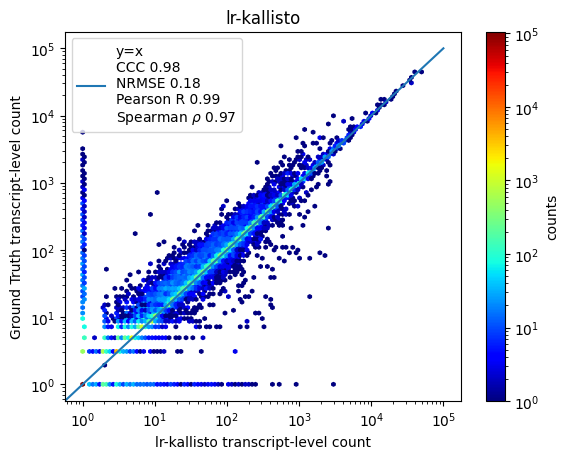

0.17652
PB_k-63
Pearson's r:	 0.9850019494050473
Spearman's rho:	 0.9695287442982965
Kendall's tau:	 0.9570239022476847
0.47615
bambu  PB
Pearson's r:	 0.9293124180583678
Spearman's rho:	 0.9639659787757097
Kendall's tau:	 0.9469389580983577
CCC 0.9098195554249684
Pearson's r:	 0.9293440068950982
Spearman's rho:	 0.9639010507949687
Kendall's tau:	 0.9469040990487128


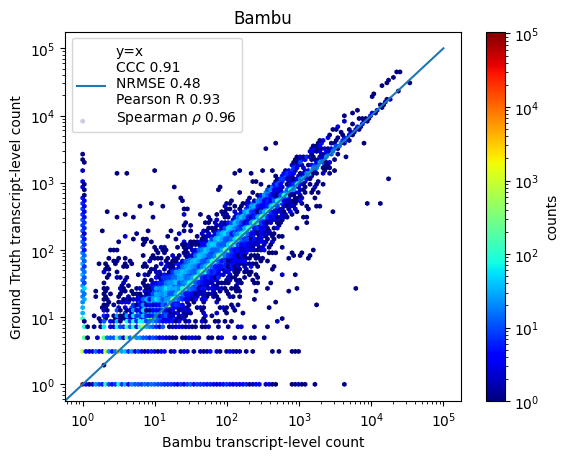

0.47586
bambu quantOnly  PB
Pearson's r:	 0.9293440068950982
Spearman's rho:	 0.9639010507949687
Kendall's tau:	 0.9469040990487128
CCC 0.9944021709523604
Pearson's r:	 0.9947097379372943
Spearman's rho:	 0.9795312142069892
Kendall's tau:	 0.9743010425108749


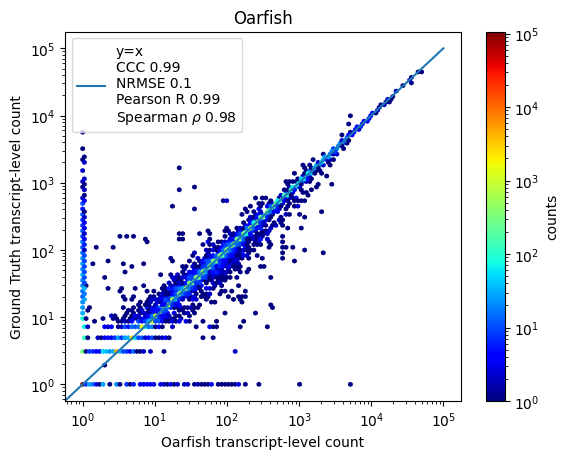

0.10452
oarfish: PB
Pearson's r:	 0.9947097379372943
Spearman's rho:	 0.9795312142069892
Kendall's tau:	 0.9743010425108749
CCC 0.9044782891707887
Pearson's r:	 0.9050256356848582
Spearman's rho:	 0.9797657106054738
Kendall's tau:	 0.9750380421699373


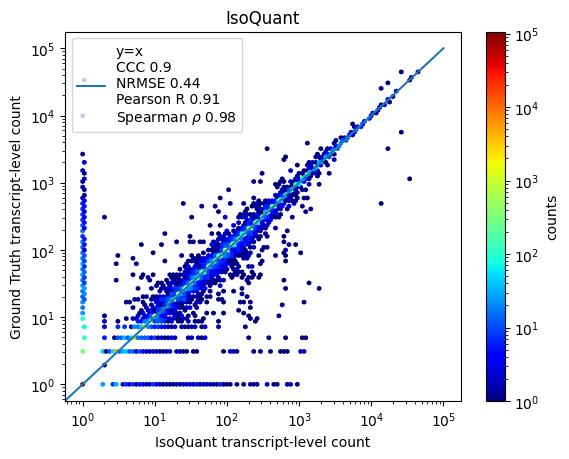

0.44489
IsoQuant: PB_k-63
Pearson's r:	 0.9050256356848582
Spearman's rho:	 0.9797657106054738
Kendall's tau:	 0.9750380421699373
CCC 0.9519096104541248
Pearson's r:	 0.9557505988744548
Spearman's rho:	 0.9767583528103969
Kendall's tau:	 0.9649327691667312


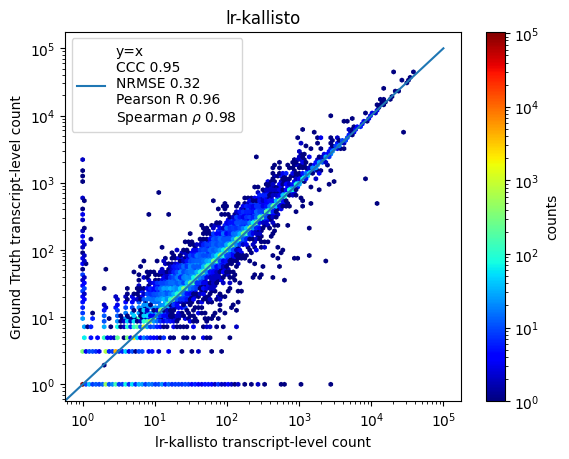

/tmp/ipykernel_152044/825869220.py:324: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  count_iso = pd.read_csv(


count_iso:                 transcript_id  iso_count
0       ENSMUST00000000834.4       8.00
1      ENSMUST00000001166.14     560.33
2      ENSMUST00000001172.12     498.00
3       ENSMUST00000001339.6     620.50
4      ENSMUST00000001724.12     577.50
...                      ...        ...
39475   ENSMUST00000189201.2      62.00
39476   ENSMUST00000191652.2      63.00
39477   ENSMUST00000238471.2     730.00
39478   ENSMUST00000238676.2      10.00
39479   ENSMUST00000238758.2     696.25

[39480 rows x 2 columns]
count_iso:              transcript_id  iso_count
0      ENSMUST00000000834       8.00
1      ENSMUST00000001166     560.33
2      ENSMUST00000001172     498.00
3      ENSMUST00000001339     620.50
4      ENSMUST00000001724     577.50
...                   ...        ...
39475  ENSMUST00000189201      62.00
39476  ENSMUST00000191652      63.00
39477  ENSMUST00000238471     730.00
39478  ENSMUST00000238676      10.00
39479  ENSMUST00000238758     696.25

[39480 rows x 2 columns]


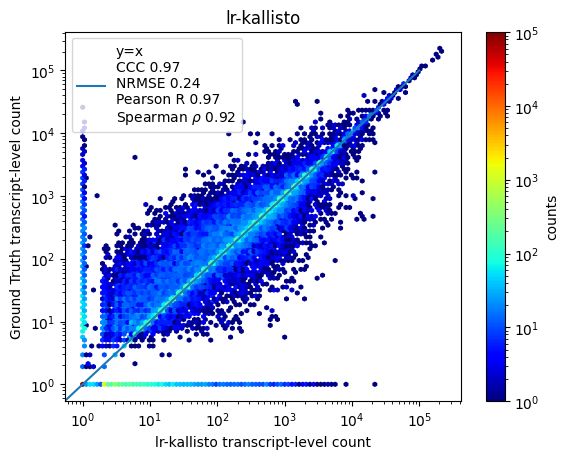

0.23847
ONT.R10.4_k-63
Pearson's r:	 0.9718574976700539
Spearman's rho:	 0.9196712637118073
Kendall's tau:	 0.8845339718062757
CCC 0.8822620799059765
Pearson's r:	 0.8925246517909956
Spearman's rho:	 0.9044623045862304
Kendall's tau:	 0.8647841592999508


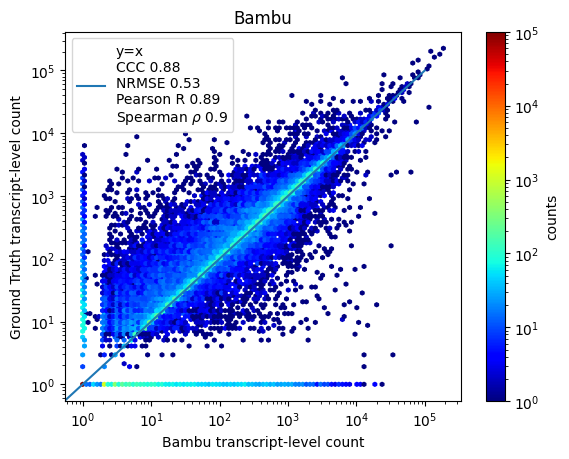

0.52659
bambu  ONT.R10.4
Pearson's r:	 0.8925246517909956
Spearman's rho:	 0.9044623045862304
Kendall's tau:	 0.8647841592999508
0.23809
oarfish: ONT.R10.4
Pearson's r:	 0.9712920605434566
Spearman's rho:	 0.9526294976764985
Kendall's tau:	 0.9262313134162455
CCC 0.9711123474001372
Pearson's r:	 0.9712920605434566
Spearman's rho:	 0.9526294976764985
Kendall's tau:	 0.9262313134162455


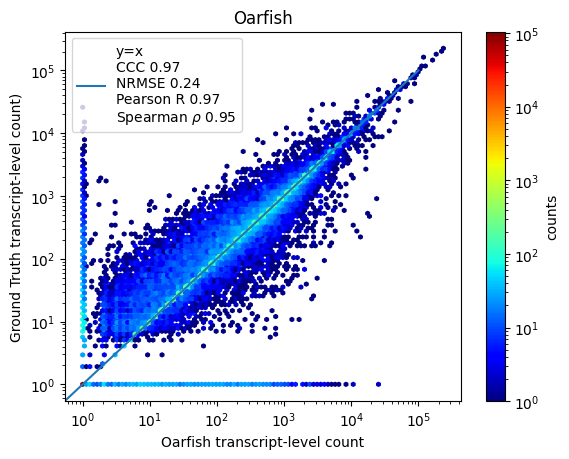

oarfish not -u f: ONT.R10.4
Pearson's r:	 0.9712920605434566
Spearman's rho:	 0.9526294976764985
Kendall's tau:	 0.9262313134162455
CCC 0.9091055536850428
Pearson's r:	 0.9127416946472103
Spearman's rho:	 0.8980256386580063
Kendall's tau:	 0.8686619591955687


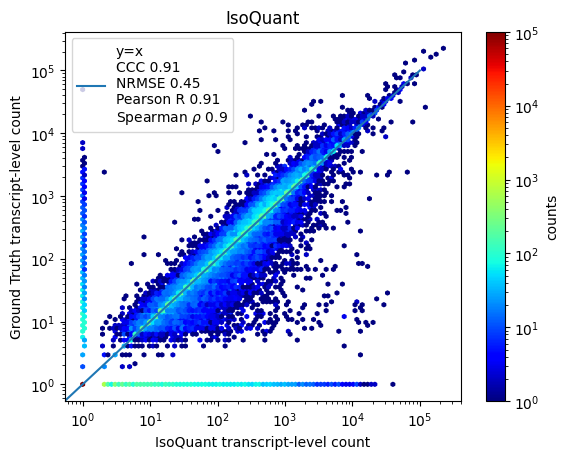

0.44673
IsoQuant: ONT.R10.4
Pearson's r:	 0.9127416946472103
Spearman's rho:	 0.8980256386580063
Kendall's tau:	 0.8686619591955687
CCC 0.8978084517324049
Pearson's r:	 0.90276004032116
Spearman's rho:	 0.8487954514197
Kendall's tau:	 0.8000032441605615


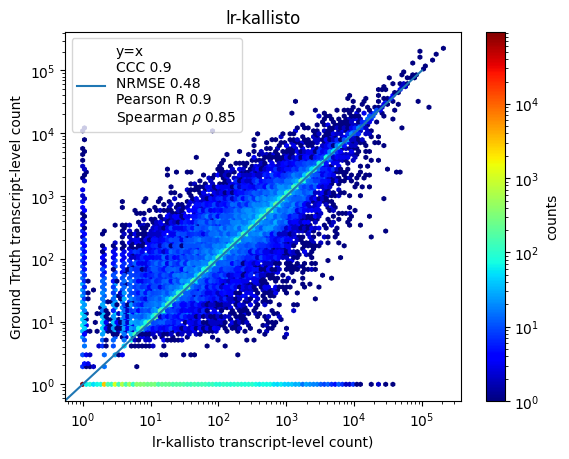

0.47774
ONT.R10.4_k-63 Length normalized
Pearson's r:	 0.90276004032116
Spearman's rho:	 0.8487954514197
Kendall's tau:	 0.8000032441605615


In [14]:
import scipy
import pandas as pd
import numpy as np
from permetrics.regression import RegressionMetric
import matplotlib.pyplot as plt

def c_ccc(y_pred,y_true):
    #y_pred = np.log(y_pred)
    #y_true = np.log(y_true)
    cor = np.corrcoef(y_true, y_pred)[0][1]
    # Means
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    # Population variances
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    # Population standard deviations
    sd_true = np.std(y_true)
    sd_pred = np.std(y_pred)
    # Calculate CCC
    numerator = 2 * cor * sd_true * sd_pred
    denominator = var_true + var_pred + (mean_true - mean_pred)**2
    ccc = numerator / denominator
    return ccc

def pearson_corr(sim, k):
    count_bus = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled._k-" + k + "_er_bus_quant_tcc.tsv",
        header=0,
        sep="\t",
    )

    count_bus_sirv = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled._k-" + k + "_er_bus_lr_quant_tcc.tsv",
        header=0,
        sep="\t",
    )
    
    count_oar = pd.read_csv(
        "Mouse." + sim + "_new_oarfish.quant",
        header=0,
        sep="\t",
        names=['transcript_id', 'length', 'oar_count'],
    )
    count_bambu = pd.read_csv(
        "Mouse_"+sim+"/counts_transcript_ENSMUST.txt",
        header=0,
        sep="\t",
        names=['transcript_id', 'gene_id', 'bambu_count'],
    )
    count_bambu_qO = pd.read_csv(
        "Mouse_"+sim+"_quantOnly/counts_transcript.txt",
        header=0,
        sep="\t",
        names=['transcript_id', 'gene_id', 'bambu_count_qO'],
    )
    count_sim = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled.csv",
        header=0,
        sep="\t",
        names=["transcript_id", "est_count"],
    )
    # IsoQuant_Mouse_IQ_${sim}
    count_iso = pd.read_csv(
        "IsoQuant_Mouse_IQ_"
        + sim
        + "/IsoQuant_Mouse_IQ_"
        + sim
        + "/IsoQuant_Mouse_IQ_"
        + sim
        + ".transcript_counts.tsv",
        header=0, skipfooter=3,
        sep="\t",
        names=["transcript_id", "iso_count"],
    )
    print("count_iso: ", count_iso)
    print(count_bus_sirv)
    
    count = count_sim.merge(count_bus, how="outer", on="transcript_id")
    count = count.merge(count_iso, how="outer", on="transcript_id")
    count = count.merge(count_oar, how="outer", on="transcript_id")
    count = count.merge(count_bambu, how="outer", on="transcript_id")
    count = count.merge(count_bambu_qO, how="outer", on="transcript_id")
    count = count.fillna(0)
    print(count)

    x = count["bus_counts"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    #print(sim+'_k-'+k)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 

    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("lr-kallisto transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")  
    plt.title("lr-kallisto")
    plt.legend()
    plt.savefig(sim+'kallisto_lr_tlc_hex.png', dpi=300)
    plt.show()
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    # y, x = y/np.sum(y)*10000000 + 1,x/np.sum(x)*10000000 + 1
    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print(sim + "_k-" + k)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    x = count["bambu_count"]+1
    y = count["est_count"]+1
    
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    # y, x = y/np.sum(y)*10000000 + 1,x/np.sum(x)*10000000 + 1
    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("bambu ", sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    x = count["bambu_count_qO"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 
    
    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("Bambu transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("Bambu")
    plt.legend()
    plt.savefig(sim+'bambu_tlc_hex.png', dpi=300)
    plt.show()
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("bambu quantOnly ", sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    x = count["oar_count"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 
 

    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("Oarfish transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("Oarfish")
    plt.legend()
    plt.savefig(sim+'oarfish_tlc_hex.png', dpi=300)
    plt.show()
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("oarfish: "+sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    
    x = count["iso_count"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 

    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("IsoQuant transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("IsoQuant")
    plt.legend()
    plt.savefig(sim+'isoquant_tlc_hex.png', dpi=300)
    plt.show()
    
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("IsoQuant: " + sim + "_k-" + k)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    count_bus_lr = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled._k-" + k + "_er_bus_lr_quant_tcc.tsv",
        header=0,
        sep="\t",
    )

    count = count_sim.merge(count_bus_lr, how="outer", on="transcript_id")
    count = count.fillna(0)

    x = count["bus_counts"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 
    
    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("lr-kallisto transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("lr-kallisto")
    plt.legend()
    plt.savefig(sim+'klr_tlc_ln_hex.png', dpi=300)
    plt.show()


def pearson_corr_ONT(sim, k):
    count_bus = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled._k-" + k + "_er_bus_quant_tcc.tsv",
        header=0,
        sep="\t",
    )
    count_bambu = pd.read_csv(
        "Mouse_"+sim+"/counts_transcript.txt",
        header=0,
        sep="\t",
        names=['transcript_id', 'gene_id', 'bambu_count'],
    )
    count_oar = pd.read_csv(
        "Mouse." + sim + "_new_oarfish.quant",
        header=0,
        sep="\t",
        names=['transcript_id', 'length', 'oar_count'],
    )

    count_oar_nuf = pd.read_csv(
        "Mouse." + sim + ".notuf.oarfish.quant",
        header=0,
        sep="\t",
        names=['transcript_id', 'length', 'oar_count_nuf'],
    )
    
    count_sim = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled.tsv",
        header=0,
        sep="\t",
        names=["transcript_id", "est_count"],
    )
    # IsoQuant_Mouse_IQ_${sim}
    count_iso = pd.read_csv(
        "IsoQuant_Mouse_IQ_"
        + sim
        + "/IsoQuant_Mouse_IQ_"
        + sim
        + "/IsoQuant_Mouse_IQ_"
        + sim
        + ".transcript_counts.tsv",
        header=0, skipfooter=3,
        sep="\t",
        names=["transcript_id", "iso_count"],
    )
    print("count_iso: ", count_iso)

    labels = pd.read_csv('Mouse.'+sim+'.simulated.shuffled._k-'+k+'_er/transcripts.txt', header=None, sep='\t')

    count_bus['transcript_id'] = [labels.values[i][0].split('.')[0] for i in range(np.shape(labels.values)[0])]
    count_iso['transcript_id'] = [count_iso['transcript_id'].values[i].split('.')[0] for i in range(np.shape(count_iso['transcript_id'].values)[0])]
    count_oar['transcript_id'] = [count_oar['transcript_id'].values[i].split('.')[0] for i in range(np.shape(count_oar['transcript_id'].values)[0])]
    count_bambu['transcript_id'] = [count_bambu['transcript_id'].values[i].split('.')[0] for i in range(np.shape(count_bambu['transcript_id'].values)[0])]
    count_oar_nuf['transcript_id'] = [count_oar_nuf['transcript_id'].values[i].split('.')[0] for i in range(np.shape(count_oar_nuf['transcript_id'].values)[0])]
    
    
    print("count_iso: ", count_iso)
    count = count_bus.merge(count_iso, how="outer", on="transcript_id")
    print(count)
    count = count.merge(count_sim, how="outer", on="transcript_id")
    count = count.fillna(0)
    print(count)

    count = count.merge(count_bambu, how="outer", on="transcript_id")
    count = count.fillna(0)
    print(count)
    
    count = count.merge(count_oar, how="outer", on="transcript_id")
    count = count.fillna(0)
    print(count)

    count = count.merge(count_oar_nuf, how="outer", on="transcript_id")
    count = count.fillna(0)
    print(count)

    x = count["bus_counts"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 


    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("lr-kallisto transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("lr-kallisto")
    plt.legend()
    plt.savefig(sim+'klr_tlc_hex.png', dpi=300)
    plt.show()
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print(sim + "_k-" + k)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    x = count["bambu_count"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 
    
    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("Bambu transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("Bambu")
    plt.legend()
    plt.savefig(sim+'bambu_tlc_hex.png', dpi=300)
    plt.show()
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("bambu ", sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    x = count["oar_count"]+1
    y = count["est_count"]+1

    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())
    # y, x = y/np.sum(y)*10000000 + 1,x/np.sum(x)*10000000 + 1

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("oarfish: "+sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    #x = count["oar_count_nuf"]+1
    #y = count["est_count"]+1

    #r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    #rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    #tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    #m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 


    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("Oarfish transcript-level count")
    plt.ylabel("Ground Truth transcript-level count)")
    plt.title("Oarfish")
    plt.legend()
    plt.savefig(sim+'oarfish_tlc_hex.png', dpi=300)
    plt.show()

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("oarfish not -u f: "+sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    
    x = count["iso_count"]+1
    y = count["est_count"]+1
    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 

    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("IsoQuant transcript-level count")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("IsoQuant")
    plt.legend()
    plt.savefig(sim+'isoquant_tlc_hex.png', dpi=300)
    plt.show()
    
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("IsoQuant: " + sim)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)

    count_bus_lr = pd.read_csv(
        "Mouse." + sim + ".simulated.shuffled._k-" + k + "_er_bus_lr_quant_tcc.tsv",
        header=0,
        sep="\t",
    )
    # count_sim = pd.read_csv("LRGASP.transcript.expression", header=0, sep='\t')
    count_bus_lr['transcript_id'] = [labels.values[i][0].split('.')[0] for i in range(np.shape(labels.values)[0])]
    count = count_sim.merge(count_bus_lr, how="outer", on="transcript_id")
    count = count.fillna(0)

    x = count["bus_counts"]+1
    y = count["est_count"]+1

    r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
    rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    m, b = np.polyfit(x, y, 1)

    ccc = c_ccc(x,y)
        
    print("CCC",ccc)
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    nrmse = evaluator.normalized_root_mean_square_error()
    #print(sim+'_k-'+k)
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    plt.plot([i for i in range(0, 100000)],[i for i in range(0, 100000)], label='y=x\nCCC '+str(round(ccc,2))+'\nNRMSE '+str(round(nrmse, 2))+'\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2))) 

    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log', xscale='log', yscale='log')
    plt.colorbar(label='counts')
    plt.xlabel("lr-kallisto transcript-level count)")
    plt.ylabel("Ground Truth transcript-level count")
    plt.title("lr-kallisto")
    plt.legend()
    plt.savefig(sim+'klr_tlc_ln_hex.png', dpi=300)
    plt.show()

    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    print(evaluator.normalized_root_mean_square_error())

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print(sim + "_k-" + k + " Length normalized")
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)


#pearson_corr("PB", str(47))
pearson_corr("PB", str(63))
pearson_corr_ONT("ONT.R10.4", str(63))
#pearson_corr_ONT("ONT.R10.4", str(31))
# pearson_corr_ONT("ONT.R10.4", str(41))
#pearson_corr_ONT("ONT.R10.4", str(31))

